# 1. 데이터 로더(Data Loader)
* 데이터의 양이 많을 때 배치 단위로 학습하는 방법

# 2. 손글씨 인식 모델 만들기

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
digits = load_digits()

x_data = digits['data']
y_data = digits['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


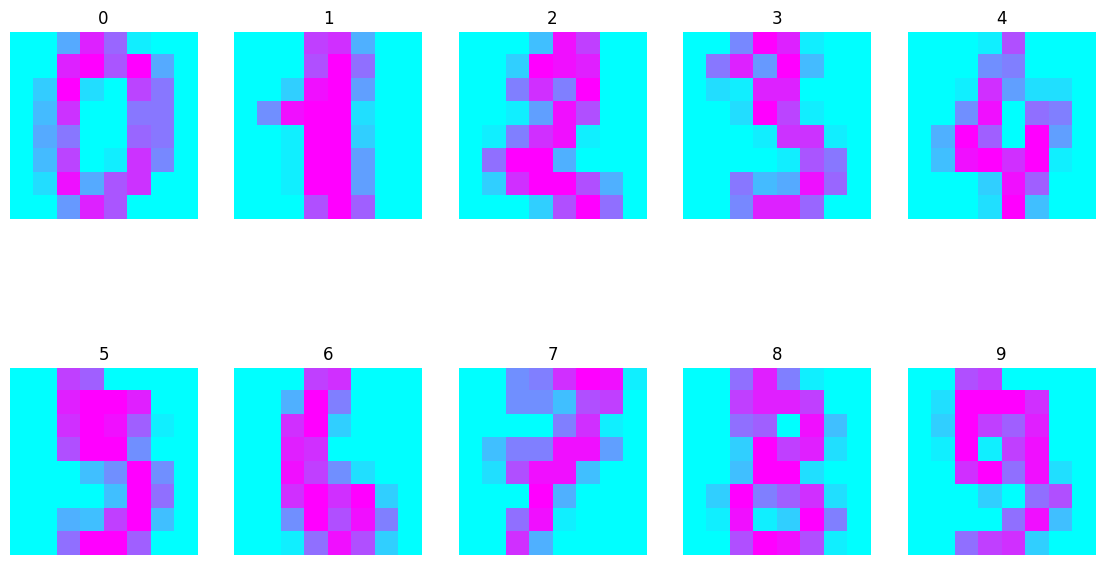

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_data[i].reshape((8,8)), cmap='cool')
  ax.set_title(y_data[i])
  ax.axis('off')

In [5]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)

print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
print(x_train.shape, x_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437, 64])
torch.Size([360, 64]) torch.Size([360])


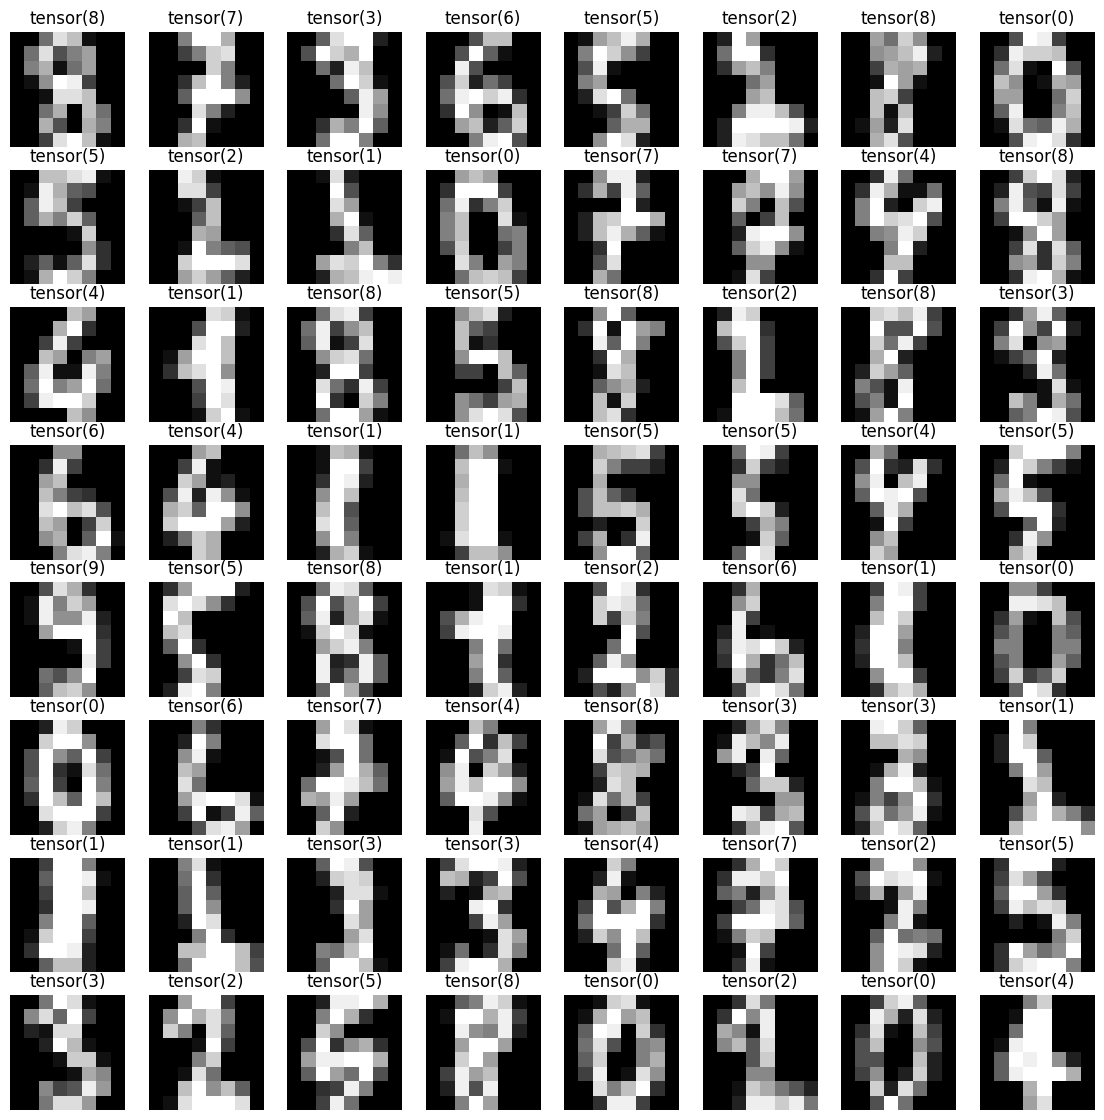

In [11]:
loader = torch.utils.data.DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size = 64,
    shuffle=True,

)
# drop_last=False

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14,14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.reshape((8,8)), cmap= 'gray')
  ax.set_title(str(label))
  ax.axis('off')

In [8]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50

for epoch in range(epochs+1):
  sum_losses = 0
  sum_accs = 0

  for x_batch, y_batch in loader:
    y_pred = model(x_batch)
    loss = nn.CrossEntropyLoss()(y_pred, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    sum_losses = sum_losses + loss

    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
    sum_accs = sum_accs + acc

  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)
  print(f'Epoch {epoch:4d}/ {epochs} Loss: {avg_loss: .6f}  Accuracy: {avg_acc: .2f}')

Epoch    0/ 50 Loss:  1.572287  Accuracy:  61.93
Epoch    1/ 50 Loss:  0.246973  Accuracy:  92.58
Epoch    2/ 50 Loss:  0.169349  Accuracy:  94.61
Epoch    3/ 50 Loss:  0.130165  Accuracy:  96.44
Epoch    4/ 50 Loss:  0.107817  Accuracy:  96.86
Epoch    5/ 50 Loss:  0.089460  Accuracy:  97.54
Epoch    6/ 50 Loss:  0.098286  Accuracy:  96.94
Epoch    7/ 50 Loss:  0.082723  Accuracy:  97.40
Epoch    8/ 50 Loss:  0.078798  Accuracy:  97.40
Epoch    9/ 50 Loss:  0.065519  Accuracy:  97.81
Epoch   10/ 50 Loss:  0.058356  Accuracy:  98.08
Epoch   11/ 50 Loss:  0.049671  Accuracy:  98.51
Epoch   12/ 50 Loss:  0.037010  Accuracy:  99.25
Epoch   13/ 50 Loss:  0.035236  Accuracy:  99.25
Epoch   14/ 50 Loss:  0.039675  Accuracy:  99.17
Epoch   15/ 50 Loss:  0.028407  Accuracy:  99.52
Epoch   16/ 50 Loss:  0.028237  Accuracy:  99.66
Epoch   17/ 50 Loss:  0.026901  Accuracy:  99.52
Epoch   18/ 50 Loss:  0.026010  Accuracy:  99.73
Epoch   19/ 50 Loss:  0.023062  Accuracy:  99.52
Epoch   20/ 50 Loss:

In [9]:
len(loader)

23

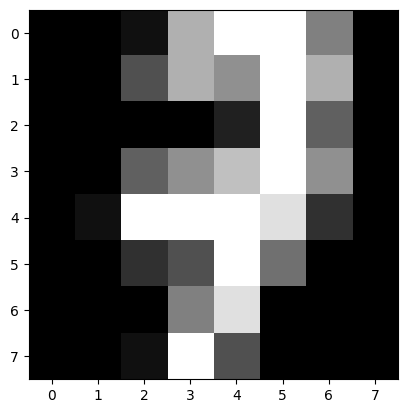

In [12]:
plt.imshow(x_test[10].reshape((8,8)), cmap='gray')

In [13]:
y_pred = model(x_test)
y_pred[10]

tensor([ -8.1951,  -2.6219, -12.3705,  -5.4134,  -2.4782,  -9.2192, -10.0245,
         12.1595,  -1.7133,   3.1068], grad_fn=<SelectBackward0>)

In [14]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([1.4455e-09, 3.8059e-07, 2.2217e-11, 2.3341e-08, 4.3938e-07, 5.1912e-10,
        2.3202e-10, 9.9988e-01, 9.4415e-07, 1.1706e-04],
       grad_fn=<SelectBackward0>)

In [16]:
for i in range(10):
  print(f'숫자 {i}일 확률 : {y_prob[10][i]:.2f}')

숫자 0일 확률 : 0.00
숫자 1일 확률 : 0.00
숫자 2일 확률 : 0.00
숫자 3일 확률 : 0.00
숫자 4일 확률 : 0.00
숫자 5일 확률 : 0.00
숫자 6일 확률 : 0.00
숫자 7일 확률 : 1.00
숫자 8일 확률 : 0.00
숫자 9일 확률 : 0.00


In [17]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다')

테스트 정확도는  96.94% 입니다
